In [157]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import torch.nn as nn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from matplotlib import pyplot

import datetime
from sklearn import linear_model

In [158]:
df = pd.DataFrame(pd.read_csv('Complete_SEDS.csv'))
df.head()

,Data_Status,MSN,StateCode,Year,Data
0,2020F,ABICB,AK,1960,0.0
1,2020F,ABICB,AK,1961,0.0
2,2020F,ABICB,AK,1962,0.0
3,2020F,ABICB,AK,1963,0.0
4,2020F,ABICB,AK,1964,0.0


In [159]:
df = df[df['StateCode']=='WA']
df = df[df.Year >= 2008]
df = df[(df.MSN == 'TETCB')]
df

,Data_Status,MSN,StateCode,Year,Data
1672658,2020F,TETCB,WA,2008,2041958.0
1672659,2020F,TETCB,WA,2009,2031913.0
1672660,2020F,TETCB,WA,2010,2007894.0
1672661,2020F,TETCB,WA,2011,2051660.0
1672662,2020F,TETCB,WA,2012,2011343.0
1672663,2020F,TETCB,WA,2013,2035649.0
1672664,2020F,TETCB,WA,2014,2008907.0
1672665,2020F,TETCB,WA,2015,1995985.0
1672666,2020F,TETCB,WA,2016,2056396.0
1672667,2020F,TETCB,WA,2017,2075340.0


In [160]:
features = ['Year','Data']
df = df[(df.MSN == 'TETCB')]
df = df[features]
df.head()

,Year,Data
1672658,2008,2041958.0
1672659,2009,2031913.0
1672660,2010,2007894.0
1672661,2011,2051660.0
1672662,2012,2011343.0


In [161]:
X = df.iloc[:,1].values
Y = df.iloc[:,0].values

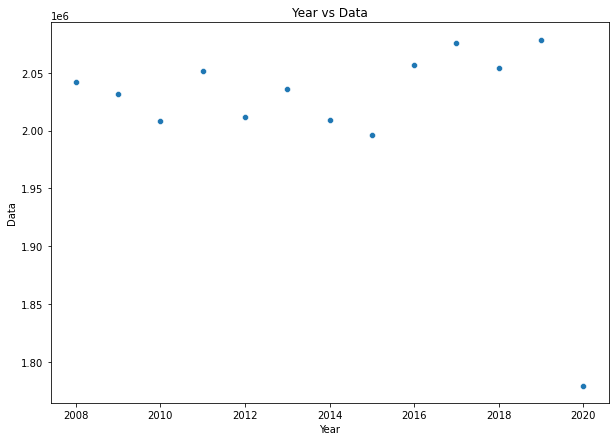

In [162]:

import matplotlib.pyplot as plt
%matplotlib inline



fig=plt.figure(figsize = (10, 7))
sns.scatterplot(x="Year", y="Data", data=df)
plt.title('Year vs Data')
plt.xlabel('Year')
plt.ylabel('Data')

plt.show()

In [132]:
import pandas as pd

# Load the XLSX file into a pandas DataFrame
df = pd.read_excel("use_tot_sector.xlsx", sheet_name="Transportation Sector")

# Write the DataFrame to a CSV file
df.to_csv("use_tot_sector.csv", index=False)

In [24]:
df = pd.DataFrame(pd.read_csv('use_tot_sector.csv'))
df

,"Total energy consumption in the transportation sector, billion Btu",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,AK,27139.0,31895.0,34182.0,32387.0,32246.0,34379.0,36233.0,43862.0,47177.0,...,184846.0,167929.0,151923.0,155043.0,162888.0,153572.0,155868.0,163804.0,164258.0,164595.0
3,AL,176015.0,172023.0,179802.0,189395.0,190545.0,200727.0,206854.0,216031.0,242554.0,...,478191.0,472022.0,466359.0,465284.0,480784.0,504527.0,498739.0,488594.0,500768.0,497755.0
4,AR,104652.0,114214.0,116715.0,123586.0,130214.0,129593.0,136348.0,139183.0,153822.0,...,287138.0,277918.0,276347.0,280150.0,276984.0,283503.0,285148.0,286192.0,288865.0,271075.0
5,AZ,116689.0,121239.0,129736.0,136740.0,143720.0,139441.0,148689.0,159735.0,183623.0,...,513043.0,502603.0,510887.0,516809.0,526892.0,539916.0,543230.0,554065.0,569796.0,507885.0
6,CA,1224448.0,1292718.0,1316805.0,1354256.0,1421236.0,1491493.0,1592738.0,1654402.0,1779333.0,...,2828580.0,2773267.0,2777173.0,2798542.0,2865537.0,2970922.0,3049442.0,3062408.0,3059749.0,2355476.0
7,CO,104450.0,114878.0,122860.0,129258.0,133723.0,138618.0,147575.0,154378.0,172368.0,...,414063.0,410843.0,411940.0,424103.0,421452.0,430222.0,434641.0,449492.0,460280.0,378289.0
8,CT,116898.0,125496.0,130768.0,134750.0,137397.0,140533.0,150121.0,155282.0,168490.0,...,234687.0,228721.0,225149.0,225365.0,227198.0,229142.0,232069.0,237351.0,233235.0,196110.0
9,DC,28823.0,29581.0,29525.0,29602.0,31091.0,33820.0,33780.0,32459.0,32904.0,...,21211.0,19112.0,19420.0,20902.0,20276.0,21250.0,18441.0,20300.0,21802.0,16806.0


In [25]:
df_testing = df.loc[1]
df_testing

Total energy consumption in the transportation sector, billion Btu     State
Unnamed: 1                                                            1960.0
Unnamed: 2                                                            1961.0
Unnamed: 3                                                            1962.0
Unnamed: 4                                                            1963.0
                                                                       ...  
Unnamed: 57                                                           2016.0
Unnamed: 58                                                           2017.0
Unnamed: 59                                                           2018.0
Unnamed: 60                                                           2019.0
Unnamed: 61                                                           2020.0
Name: 1, Length: 62, dtype: object

In [26]:
df_WA = df.loc[49]
df_WA

Total energy consumption in the transportation sector, billion Btu          WA
Unnamed: 1                                                            180038.0
Unnamed: 2                                                            184221.0
Unnamed: 3                                                            191597.0
Unnamed: 4                                                            193702.0
                                                                        ...   
Unnamed: 57                                                           680677.0
Unnamed: 58                                                           656410.0
Unnamed: 59                                                           656582.0
Unnamed: 60                                                           676682.0
Unnamed: 61                                                           504756.0
Name: 49, Length: 62, dtype: object

In [27]:
df = pd.DataFrame((df_WA, df_testing))
df

,"Total energy consumption in the transportation sector, billion Btu",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
49,WA,180038.0,184221.0,191597.0,193702.0,200152.0,206180.0,224455.0,248016.0,282703.0,...,570277.0,571883.0,585103.0,572869.0,611895.0,680677.0,656410.0,656582.0,676682.0,504756.0
1,State,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0


In [28]:
x=df.iloc[1].values
y=df.iloc[0].values
x = np.delete(x, 0)
y = np.delete(y, 0)
x

array([1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0,
       1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0,
       1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0,
       1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0,
       1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
       2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
       2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0, 2017.0, 2018.0, 2019.0, 2020.0], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

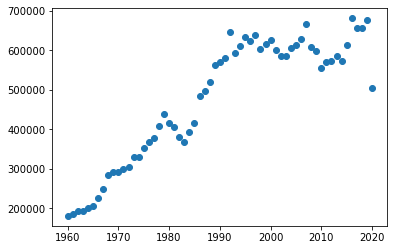

In [29]:
plt.scatter(x,y)
plt.show

<BarContainer object of 61 artists>

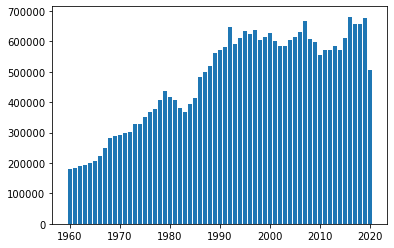

In [30]:
plt.bar(x,y)

In [31]:
X=x

X=X.reshape(-1,1)
y=y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_test)
X_norm = min_max_scaler.transform(X)

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
print (xtrain[0:10, :])

[[ 1.05876909]
 [-1.28715539]
 [-0.89616798]
 [ 0.10922823]
 [ 1.17047978]
 [-0.0583378 ]
 [ 0.66778168]
 [ 1.39390116]
 [-0.6727466 ]
 [ 1.50561185]]


In [34]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)
from sklearn import datasets, linear_model, metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score

classifier = linear_model.LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [35]:
classifier.predict(X_train)

array([[625727.91246326],
       [284845.37253881],
       [341659.12919289],
       [487751.64630336],
       [641960.41436442],
       [463402.89345161],
       [568914.15580918],
       [674425.41816675],
       [374124.13299521],
       [690657.92006791],
       [447170.39155045],
       [349775.38014347],
       [268612.87063765],
       [479635.39535278],
       [357891.63109405],
       [650076.665315  ],
       [390356.63489638],
       [698774.17101849],
       [292961.62348939],
       [333542.8782423 ],
       [430937.88964929],
       [528332.90105627],
       [366007.88204463],
       [593262.90866093],
       [617611.66151267],
       [666309.16721617],
       [536449.15200685],
       [236147.86683532],
       [325426.62729172],
       [601379.15961151],
       [422821.6386987 ],
       [276729.12158823],
       [414705.38774812],
       [520216.65010569],
       [633844.16341384],
       [398472.88584696],
       [382240.38394579],
       [301077.87443997],
       [5445

Text(0, 0.5, 'Consumption in BTU')

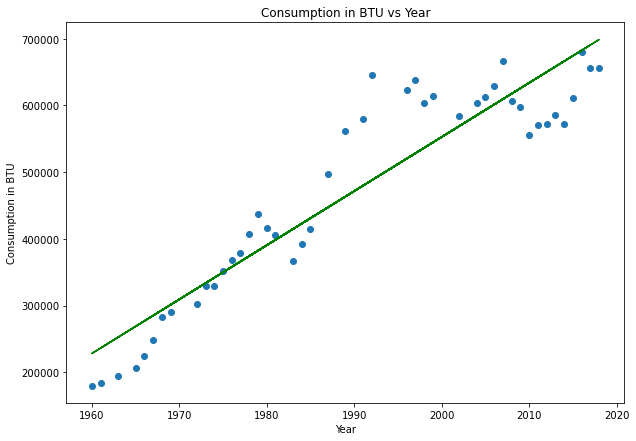

In [36]:
x=X_train
y=y_train
n = np.size(x)

y_pred = classifier.predict(X_train)
    
fig=plt.figure(figsize = (10, 7))
plt.title('Consumption in BTU vs Year')
plt.scatter(x,y)
plt.plot(x, y_pred, color = 'green')
plt.xlabel('Year')
plt.ylabel('Consumption in BTU')

In [37]:
print('Variance score: {}'.format(classifier.score(X_test, y_test)))

Variance score: 0.714134397638167


In [38]:
# model evaluation
mse=mean_squared_error(y,y_pred)
  
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
  
# printing values
print('Slope:' ,classifier.coef_)
print('Intercept:', classifier.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8116.25095058]]
Intercept: [-15679820.2472561]
MSE: 3321290549.3232965
Root mean squared error:  57630.63898069582
R2 score:  0.8640810817477779
